In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.ensemble import GradientBoostingClassifier

C:\Users\Chithsabesh\AppData\Local\Continuum\anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
C:\Users\Chithsabesh\AppData\Local\Continuum\anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
C:\Users\Chithsabesh\AppData\Local\Continuum\anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [2]:
takehome_users = pd.read_csv('takehome_users.csv',encoding='latin-1')

In [3]:
takehome_users.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0


In [4]:
takehome_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 10 columns):
object_id                     12000 non-null int64
creation_time                 12000 non-null object
name                          12000 non-null object
email                         12000 non-null object
creation_source               12000 non-null object
last_session_creation_time    8823 non-null float64
opted_in_to_mailing_list      12000 non-null int64
enabled_for_marketing_drip    12000 non-null int64
org_id                        12000 non-null int64
invited_by_user_id            6417 non-null float64
dtypes: float64(2), int64(4), object(4)
memory usage: 937.6+ KB


## Convert both times to timestamp since they are float

In [5]:
takehome_users['creation_time'] =  pd.to_datetime(takehome_users['creation_time'], format=None)

In [6]:
takehome_users['last_session_creation_time'] = pd.to_datetime(takehome_users['creation_time'],format=None)

In [7]:
takehome_users.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,2014-04-22 03:53:30,1,0,11,10803.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,2013-11-15 03:45:04,0,0,1,316.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,2013-03-19 23:14:52,0,0,94,1525.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,2013-05-21 08:09:28,0,0,1,5151.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,2013-01-17 10:14:20,0,0,193,5240.0


(array([0, 1, 2, 3, 4]), <a list of 5 Text xticklabel objects>)

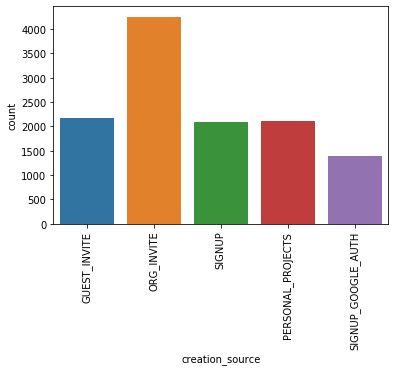

In [8]:
sns.countplot(x='creation_source',data=takehome_users)
plt.xticks(rotation=90)

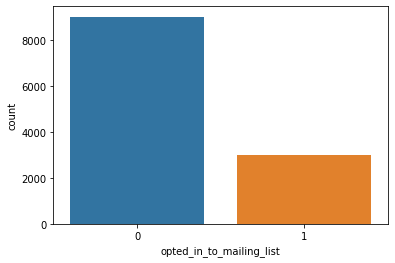

In [9]:
sns.countplot(x='opted_in_to_mailing_list',data=takehome_users)

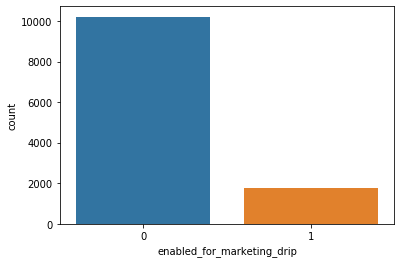

In [10]:
sns.countplot(x='enabled_for_marketing_drip',data=takehome_users)

In [11]:
print('Number of Unique users:',takehome_users['object_id'].nunique())
print('Number of Unique Organisations:',takehome_users['org_id'].nunique())


Number of Unique users: 12000
Number of Unique Organisations: 417


In [12]:
takehome_users['invited_by_user_id'].value_counts()

10741.0    13
2527.0     12
2308.0     11
1525.0     11
11770.0    11
           ..
2746.0      1
10456.0     1
8371.0      1
6266.0      1
3572.0      1
Name: invited_by_user_id, Length: 2564, dtype: int64

In [13]:
##Users log in Data
takehome_users_engagement = pd.read_csv('takehome_user_engagement.csv',encoding='latin-1')


In [14]:
takehome_users_engagement.head()

,time_stamp,user_id,visited
0,2014-04-22 03:53:30,1,1
1,2013-11-15 03:45:04,2,1
2,2013-11-29 03:45:04,2,1
3,2013-12-09 03:45:04,2,1
4,2013-12-25 03:45:04,2,1


In [15]:
takehome_users_engagement.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207917 entries, 0 to 207916
Data columns (total 3 columns):
time_stamp    207917 non-null object
user_id       207917 non-null int64
visited       207917 non-null int64
dtypes: int64(2), object(1)
memory usage: 4.8+ MB


In [16]:
takehome_users_engagement['time_stamp'] = pd.to_datetime(takehome_users_engagement['time_stamp'])

In [17]:
takehome_users_engagement.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207917 entries, 0 to 207916
Data columns (total 3 columns):
time_stamp    207917 non-null datetime64[ns]
user_id       207917 non-null int64
visited       207917 non-null int64
dtypes: datetime64[ns](1), int64(2)
memory usage: 4.8 MB


In [18]:
##Pivoting the dataset
pivot_users = pd.pivot_table(takehome_users_engagement,values='visited',index=['user_id','time_stamp'])

In [19]:
pivot_users.head(20)

visited
user_id time_stamp                  
1       2014-04-22 03:53:30        1
2       2013-11-15 03:45:04        1
        2013-11-29 03:45:04        1
        2013-12-09 03:45:04        1
        2013-12-25 03:45:04        1
        2013-12-31 03:45:04        1
        2014-01-08 03:45:04        1
        2014-02-03 03:45:04        1
        2014-02-08 03:45:04        1
        2014-02-09 03:45:04        1
        2014-02-13 03:45:04        1
        2014-02-16 03:45:04        1
        2014-03-09 03:45:04        1
        2014-03-13 03:45:04        1
        2014-03-31 03:45:04        1
3       2013-03-19 23:14:52        1
4       2013-05-22 08:09:28        1
5       2013-01-22 10:14:20        1
6       2013-12-19 03:37:06        1
7       2012-12-20 13:24:32        1

In [20]:
level_values = pivot_users.index.get_level_values


In [21]:
level_values

<bound method MultiIndex.get_level_values of MultiIndex([(    1, '2014-04-22 03:53:30'),
            (    2, '2013-11-15 03:45:04'),
            (    2, '2013-11-29 03:45:04'),
            (    2, '2013-12-09 03:45:04'),
            (    2, '2013-12-25 03:45:04'),
            (    2, '2013-12-31 03:45:04'),
            (    2, '2014-01-08 03:45:04'),
            (    2, '2014-02-03 03:45:04'),
            (    2, '2014-02-08 03:45:04'),
            (    2, '2014-02-09 03:45:04'),
            ...
            (11991, '2014-04-28 14:22:45'),
            (11991, '2014-05-17 14:22:45'),
            (11991, '2014-05-30 14:22:45'),
            (11992, '2014-04-11 19:39:56'),
            (11995, '2013-10-22 13:33:17'),
            (11996, '2013-09-06 06:14:15'),
            (11997, '2013-01-15 18:28:37'),
            (11998, '2014-04-27 12:45:16'),
            (11999, '2012-06-02 11:55:59'),
            (12000, '2014-01-26 08:57:12')],
           names=['user_id', 'time_stamp'], length=207917)

In [22]:
pivot_userss = (pivot_users.groupby([level_values(i) for i in [0,1]] +[pd.Grouper(freq='1w', level=-1)])).count()


In [23]:
pivot_userss.head(30)

visited
user_id time_stamp          time_stamp         
1       2014-04-22 03:53:30 2014-04-27        1
2       2013-11-15 03:45:04 2013-11-17        1
        2013-11-29 03:45:04 2013-12-01        1
        2013-12-09 03:45:04 2013-12-15        1
        2013-12-25 03:45:04 2013-12-29        1
        2013-12-31 03:45:04 2014-01-05        1
        2014-01-08 03:45:04 2014-01-12        1
        2014-02-03 03:45:04 2014-02-09        1
        2014-02-08 03:45:04 2014-02-09        1
        2014-02-09 03:45:04 2014-02-09        1
        2014-02-13 03:45:04 2014-02-16        1
        2014-02-16 03:45:04 2014-02-16        1
        2014-03-09 03:45:04 2014-03-09        1
        2014-03-13 03:45:04 2014-03-16        1
        2014-03-31 03:45:04 2014-04-06        1
3       2013-03-19 23:14:52 2013-03-24        1
4       2013-05-22 08:09:28 2013-05-26        1
5       2013-01-22 10:14:20 2013-01-27        1
6       2013-12-19 03:37:06 2013-12-22        1
7       2012-12-20 13:24:32 2012-12-23        1
10      2013-01-16 22:08:03 2013-01-20        1
        2013-01-22 22:08:03 2013-01-27        1
        2013-01-30 22:08:03 2013-02-03        1
        2013-02-04 22:08:03 2013-02-10        1
        2013-02-06 22:08:03 2013-02-10        1
        2013-02-14 22:08:03 2013-02-17        1
        2013-02-17 22:08:03 2013-02-17        1
        2013-02-19 22:08:03 2013-02-24        1
        2013-02-26 22:08:03 2013-03-03        1
        2013-03-01 22:08:03 2013-03-03        1

In [24]:
#formatting
pivot_userss1=pivot_userss.reset_index(level=1)

In [25]:
pivot_userss1

time_stamp  visited
user_id time_stamp                             
1       2014-04-27 2014-04-22 03:53:30        1
2       2013-11-17 2013-11-15 03:45:04        1
        2013-12-01 2013-11-29 03:45:04        1
        2013-12-15 2013-12-09 03:45:04        1
        2013-12-29 2013-12-25 03:45:04        1
...                                ...      ...
11996   2013-09-08 2013-09-06 06:14:15        1
11997   2013-01-20 2013-01-15 18:28:37        1
11998   2014-04-27 2014-04-27 12:45:16        1
11999   2012-06-03 2012-06-02 11:55:59        1
12000   2014-01-26 2014-01-26 08:57:12        1

[207917 rows x 2 columns]

In [27]:
pivot_userss2=pivot_userss1.drop(['time_stamp'],axis=1)

In [28]:
pivot_userss2

visited
user_id time_stamp         
1       2014-04-27        1
2       2013-11-17        1
        2013-12-01        1
        2013-12-15        1
        2013-12-29        1
...                     ...
11996   2013-09-08        1
11997   2013-01-20        1
11998   2014-04-27        1
11999   2012-06-03        1
12000   2014-01-26        1

[207917 rows x 1 columns]

In [29]:
pivot_users3=pivot_userss2.reset_index()


In [30]:
pivot_users3

,user_id,time_stamp,visited
0,1,2014-04-27,1
1,2,2013-11-17,1
2,2,2013-12-01,1
3,2,2013-12-15,1
4,2,2013-12-29,1
...,...,...,...
207912,11996,2013-09-08,1
207913,11997,2013-01-20,1
207914,11998,2014-04-27,1
207915,11999,2012-06-03,1


In [31]:
#grouping by user_id and timestamp and formatting to take max
pivot_users4=pivot_users3.groupby(['user_id','time_stamp']).sum()

In [32]:
pivot_users4

visited
user_id time_stamp         
1       2014-04-27        1
2       2013-11-17        1
        2013-12-01        1
        2013-12-15        1
        2013-12-29        1
...                     ...
11996   2013-09-08        1
11997   2013-01-20        1
11998   2014-04-27        1
11999   2012-06-03        1
12000   2014-01-26        1

[68807 rows x 1 columns]

In [33]:
pivot_users5=pivot_users4.reset_index()


In [34]:
pivot_users5

,user_id,time_stamp,visited
0,1,2014-04-27,1
1,2,2013-11-17,1
2,2,2013-12-01,1
3,2,2013-12-15,1
4,2,2013-12-29,1
...,...,...,...
68802,11996,2013-09-08,1
68803,11997,2013-01-20,1
68804,11998,2014-04-27,1
68805,11999,2012-06-03,1


In [35]:
final=pivot_users5.groupby('user_id').max()

In [36]:
final

,time_stamp,visited
user_id,,
1,2014-04-27,1
2,2014-04-06,3
3,2013-03-24,1
4,2013-05-26,1
5,2013-01-27,1
...,...,...
11996,2013-09-08,1
11997,2013-01-20,1
11998,2014-04-27,1


In [37]:
final=final.drop('time_stamp',axis=1)
final=final.reset_index()

In [38]:
final

,user_id,visited
0,1,1
1,2,3
2,3,1
3,4,1
4,5,1
...,...,...
8818,11996,1
8819,11997,1
8820,11998,1
8821,11999,1


In [39]:
#merging two datasets
total_df=takehome_users.merge(final, how='left',  left_on='object_id', right_on='user_id')
total_df.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,user_id,visited
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,2014-04-22 03:53:30,1,0,11,10803.0,1.0,1.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,2013-11-15 03:45:04,0,0,1,316.0,2.0,3.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,2013-03-19 23:14:52,0,0,94,1525.0,3.0,1.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,2013-05-21 08:09:28,0,0,1,5151.0,4.0,1.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,2013-01-17 10:14:20,0,0,193,5240.0,5.0,1.0


In [40]:
total_df=total_df.drop(['user_id'],axis=1)


In [41]:
total_df['adopted']=total_df.visited>=3


In [42]:
total_df=total_df.drop(['object_id','creation_time','name','email','last_session_creation_time','visited','invited_by_user_id'],axis=1)
total_df.head()

,creation_source,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,adopted
0,GUEST_INVITE,1,0,11,False
1,ORG_INVITE,0,0,1,True
2,ORG_INVITE,0,0,94,False
3,GUEST_INVITE,0,0,1,False
4,GUEST_INVITE,0,0,193,False


In [43]:
total_df['adopted'].value_counts()/total_df.shape[0]*100


False    87.958333
True     12.041667
Name: adopted, dtype: float64

In [44]:
total_df['adopted'] = total_df['adopted'].astype(str)

## Modelling

In [45]:
df_dummies      = pd.get_dummies(total_df.drop('adopted',axis = 1))
df_dummies['adopted'] = total_df['adopted']
df_dummies.shape

(12000, 9)

In [46]:
df_dummies

,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,creation_source_GUEST_INVITE,creation_source_ORG_INVITE,creation_source_PERSONAL_PROJECTS,creation_source_SIGNUP,creation_source_SIGNUP_GOOGLE_AUTH,adopted
0,1,0,11,1,0,0,0,0,False
1,0,0,1,0,1,0,0,0,True
2,0,0,94,0,1,0,0,0,False
3,0,0,1,1,0,0,0,0,False
4,0,0,193,1,0,0,0,0,False
...,...,...,...,...,...,...,...,...,...
11995,0,0,89,0,1,0,0,0,False
11996,0,0,200,0,0,0,0,1,False
11997,1,1,83,1,0,0,0,0,False
11998,0,0,6,0,0,1,0,0,False


In [47]:
train,test = train_test_split(df_dummies,test_size=0.3,
                             random_state = 100)
print(train.shape)
print(test.shape)
train.head()
#saggegate
train_y = train['adopted']
test_y  = test ['adopted']
train_x = train.drop('adopted', axis = 1)#axis 1 is for row wise operation
test_x  = test.drop ('adopted', axis = 1)
train_x.shape

(8400, 9)
(3600, 9)


(8400, 8)

In [48]:
logreg = LogisticRegression(random_state=1)
logreg.fit(train_x,train_y)
log_pred  = logreg.predict(test_x)


In [49]:
score=logreg.score(train_x,train_y)
print(score)

0.8785714285714286


In [50]:
print(classification_report(test_y,log_pred))

              precision    recall  f1-score   support

       False       0.88      1.00      0.94      3175
        True       0.00      0.00      0.00       425

    accuracy                           0.88      3600
   macro avg       0.44      0.50      0.47      3600
weighted avg       0.78      0.88      0.83      3600



C:\Users\Chithsabesh\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [51]:
coef=logreg.coef_
columns=train_x.columns

df_coef=pd.DataFrame(data=coef[0],index=columns)
df_ranked=df_coef.sort_values(0)
df_ranked

,0
creation_source_PERSONAL_PROJECTS,-0.991410
creation_source_ORG_INVITE,-0.433526
creation_source_SIGNUP,-0.226032
creation_source_SIGNUP_GOOGLE_AUTH,-0.150495
creation_source_GUEST_INVITE,-0.042379
enabled_for_marketing_drip,0.001413
org_id,0.001582
opted_in_to_mailing_list,0.074615


In [61]:
## Remove org_id and do gradient boosting
train_x = train_x.drop('org_id', axis = 1)#axis 1 is for row wise operation
test_x  = test_x.drop('org_id', axis = 1)
train_x.shape

(8400, 7)

In [62]:
##gradient Boosting
gb = GradientBoostingClassifier(random_state=1,n_estimators=50)
gb.fit(train_x,train_y)
gb_pred  = gb.predict(test_x)
score=gb.score(train_x,train_y)
print(score)

0.8785714285714286


In [63]:
gb.feature_importances_.shape


(7,)

In [64]:
features = pd.Series(gb.feature_importances_, index=train_x.columns)


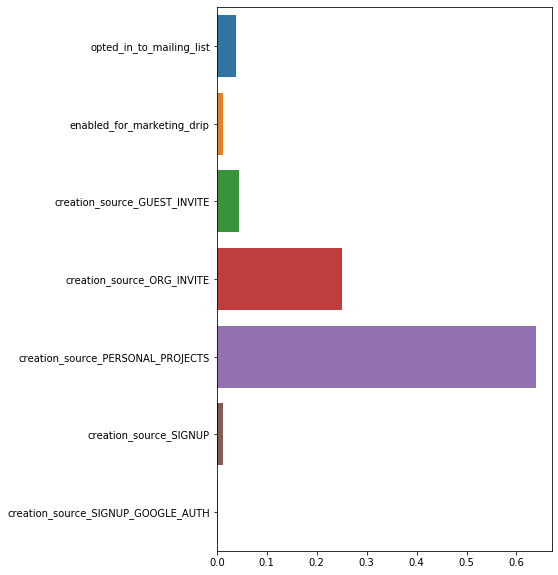

In [65]:
plt.figure(figsize=(6,10))
sns.barplot(y=train_x.columns, x=gb.feature_importances_)

## Creation source personal projects is the most important feature

In [60]:
train_x['org_id'].nunique()

417

## Conclusion
## All creation sources are told to be having maximum inverse weightages